In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [ ]:
import scanpy as sc
import pandas as pd
import scanpy as sc 
import sys 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
sys.path.append('../../src')

from spaceoracle.virtual_tissue import VirtualTissue

In [31]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,
    "svg.fonttype": 'none'
})

figure_params = {
    'dpi': 300, 
    'bbox_inches': 'tight', 
    'format': 'svg', 
    'transparent': True
}

In [141]:
# adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad')
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.h5ad')
adata.obs = adata.obs.join(pd.read_csv(
    '../../notebooks/mouse_lymphnode_slideseq/banksy_cluster.csv', index_col=0)[['banksy_cluster']])

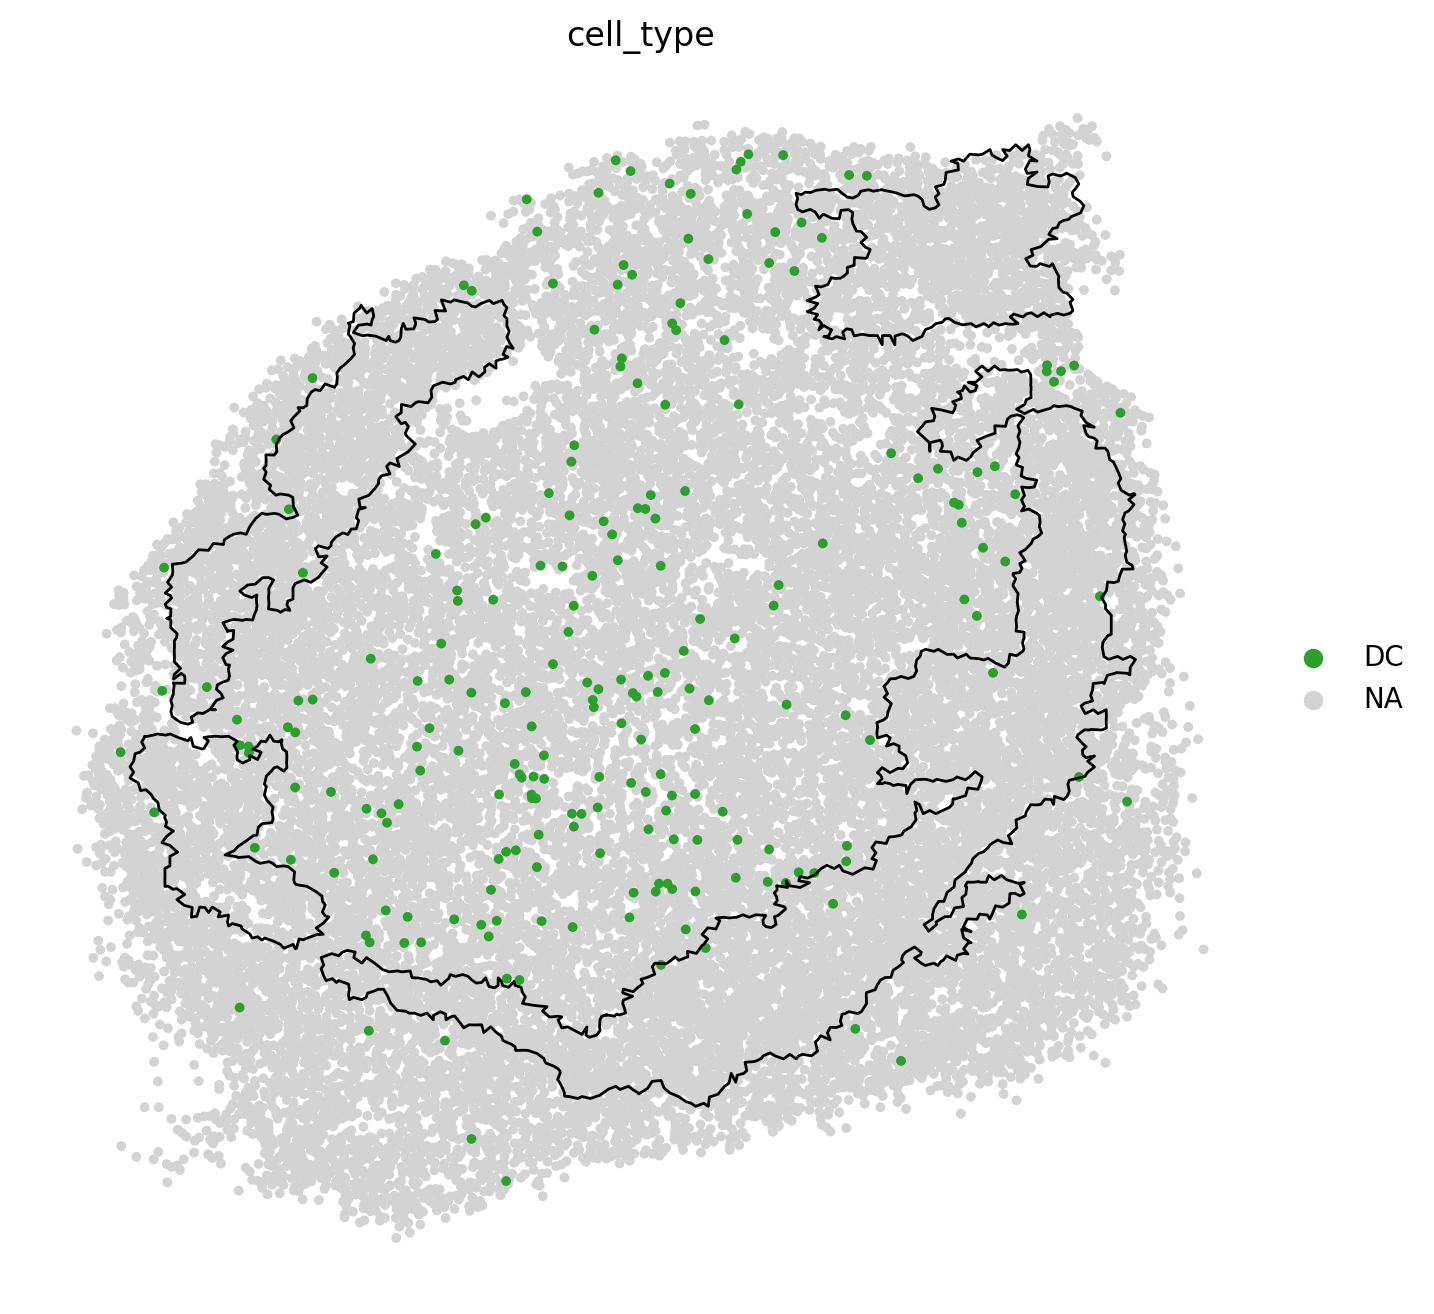

In [148]:
sc.pl.embedding(adata, basis='spatial', color='cell_type', 
    frameon=False, s=50, groups=['DC'], show=False)

alpha_shape = alphashape.alphashape(ct_points_wt[2], alpha=0.055)
for geom in alpha_shape.geoms:
    if geom.area > 30000:
        plt.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=1, linewidth=1)

In [120]:
adata = adata[adata.obs.cell_type != 'DC']

In [121]:
import json
import anndata as ad
with open('./colors.json', 'r') as f:
    color_dict = json.load(f)

In [122]:
color_dict[0] = '#9247c3'
color_dict[1] = '#78c95e'
color_dict[2] = '#c5573d'
color_dict[3] = '#c6b054'

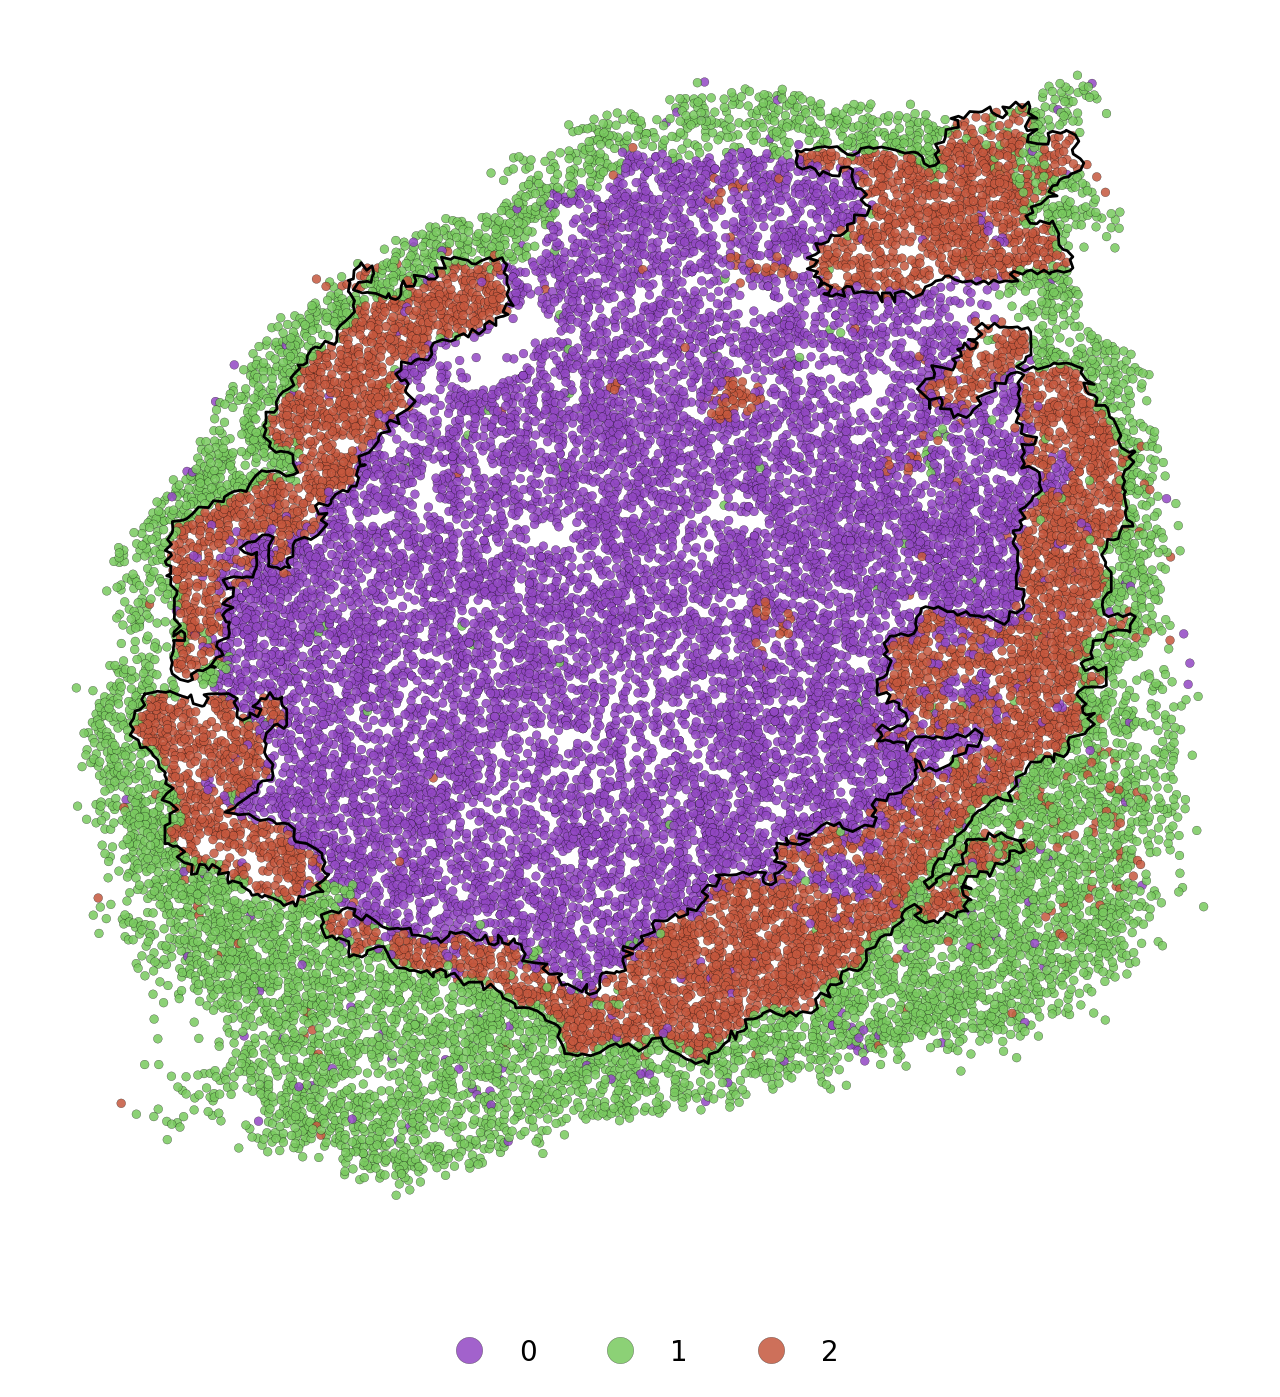

In [131]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 100


import alphashape

ct_points_wt = {}
for ct in adata.obs['banksy_cluster'].unique():
    points = np.asarray(
        adata[adata.obs['banksy_cluster'] == ct].obsm['spatial'])
    delta = 20
    points = np.vstack(
        (points +[-delta,delta], points +[-delta,-delta], 
        points +[delta,delta], points +[delta,-delta]))
    ct_points_wt[ct] = points

adatax = adata

sns.scatterplot(data=adatax.obs, 
    x=adatax.obsm['spatial'][:,0], 
    y=adatax.obsm['spatial'][:,1],
    s=10,
    alpha=0.85,
    edgecolor='black',
    linewidth=0.1,
    hue='banksy_cluster',
    legend='brief', palette=color_dict)
plt.axis('off')

alpha_shape = alphashape.alphashape(ct_points_wt[2], alpha=0.055)
for geom in alpha_shape.geoms:
    if geom.area > 30000:
        plt.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=1, linewidth=1)
        
# alpha_shape = alphashape.alphashape(ct_points_wt[1], alpha=0.038)
# for geom in alpha_shape.geoms:
#     if geom.area > 800000:
#         plt.plot(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color='black', alpha=1, linewidth=0.7)
        
plt.legend(bbox_to_anchor=(0.5, -0.05), 
    loc='upper center', ncol=4, frameon=False, 
    markerscale=3, fontsize=10)

# plt.savefig('./figures/spatial_celltypes.svg', **figure_params)
plt.show()

In [140]:
adata.obs.query('cell_type=="Th2"').banksy_cluster.value_counts()

banksy_cluster
0    539
1     69
2     24
Name: count, dtype: int64

In [8]:
# sc.pl.dotplot(adata, 
#     var_names=['Ccr4', 'Foxp3', 'Il2ra', 'Cd8a', 'Cd4'], 
#     groupby='cell_type', layer='normalized_count', cmap='Greens', show=False)

# plt.show()

In [33]:
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = '/Volumes/SSD/lasso_runs/slideseq_mouse_lymphnode',
    ko_path = '/Volumes/SSD/genome_screens/slideseq_mouse_lymphnode',
    color_dict=color_dict
)

In [34]:
ligands = ['Il2', 'Il15', 'Il4', 'Cxcl13', 'Ccl5', 'Lgals9']
receptors = ['Il2ra', 'Cxcr4', 'Ccr4', 'Il4ra', 'Il6st', 'Cxcr5']
tf = ['Gata3', 'Prdm1', 'Pax5', 'Foxp3', 'Bcl6', 'Stat4']
randoms = ['Gata3', 'Cux2', 'Pten', 'Fosl2', 'Zkscan3', 'Tfcp2']

In [35]:
impact_df = pd.read_csv('../../notebooks/mouse_lymphnode_slideseq/ko_impact_df.csv', index_col=0)

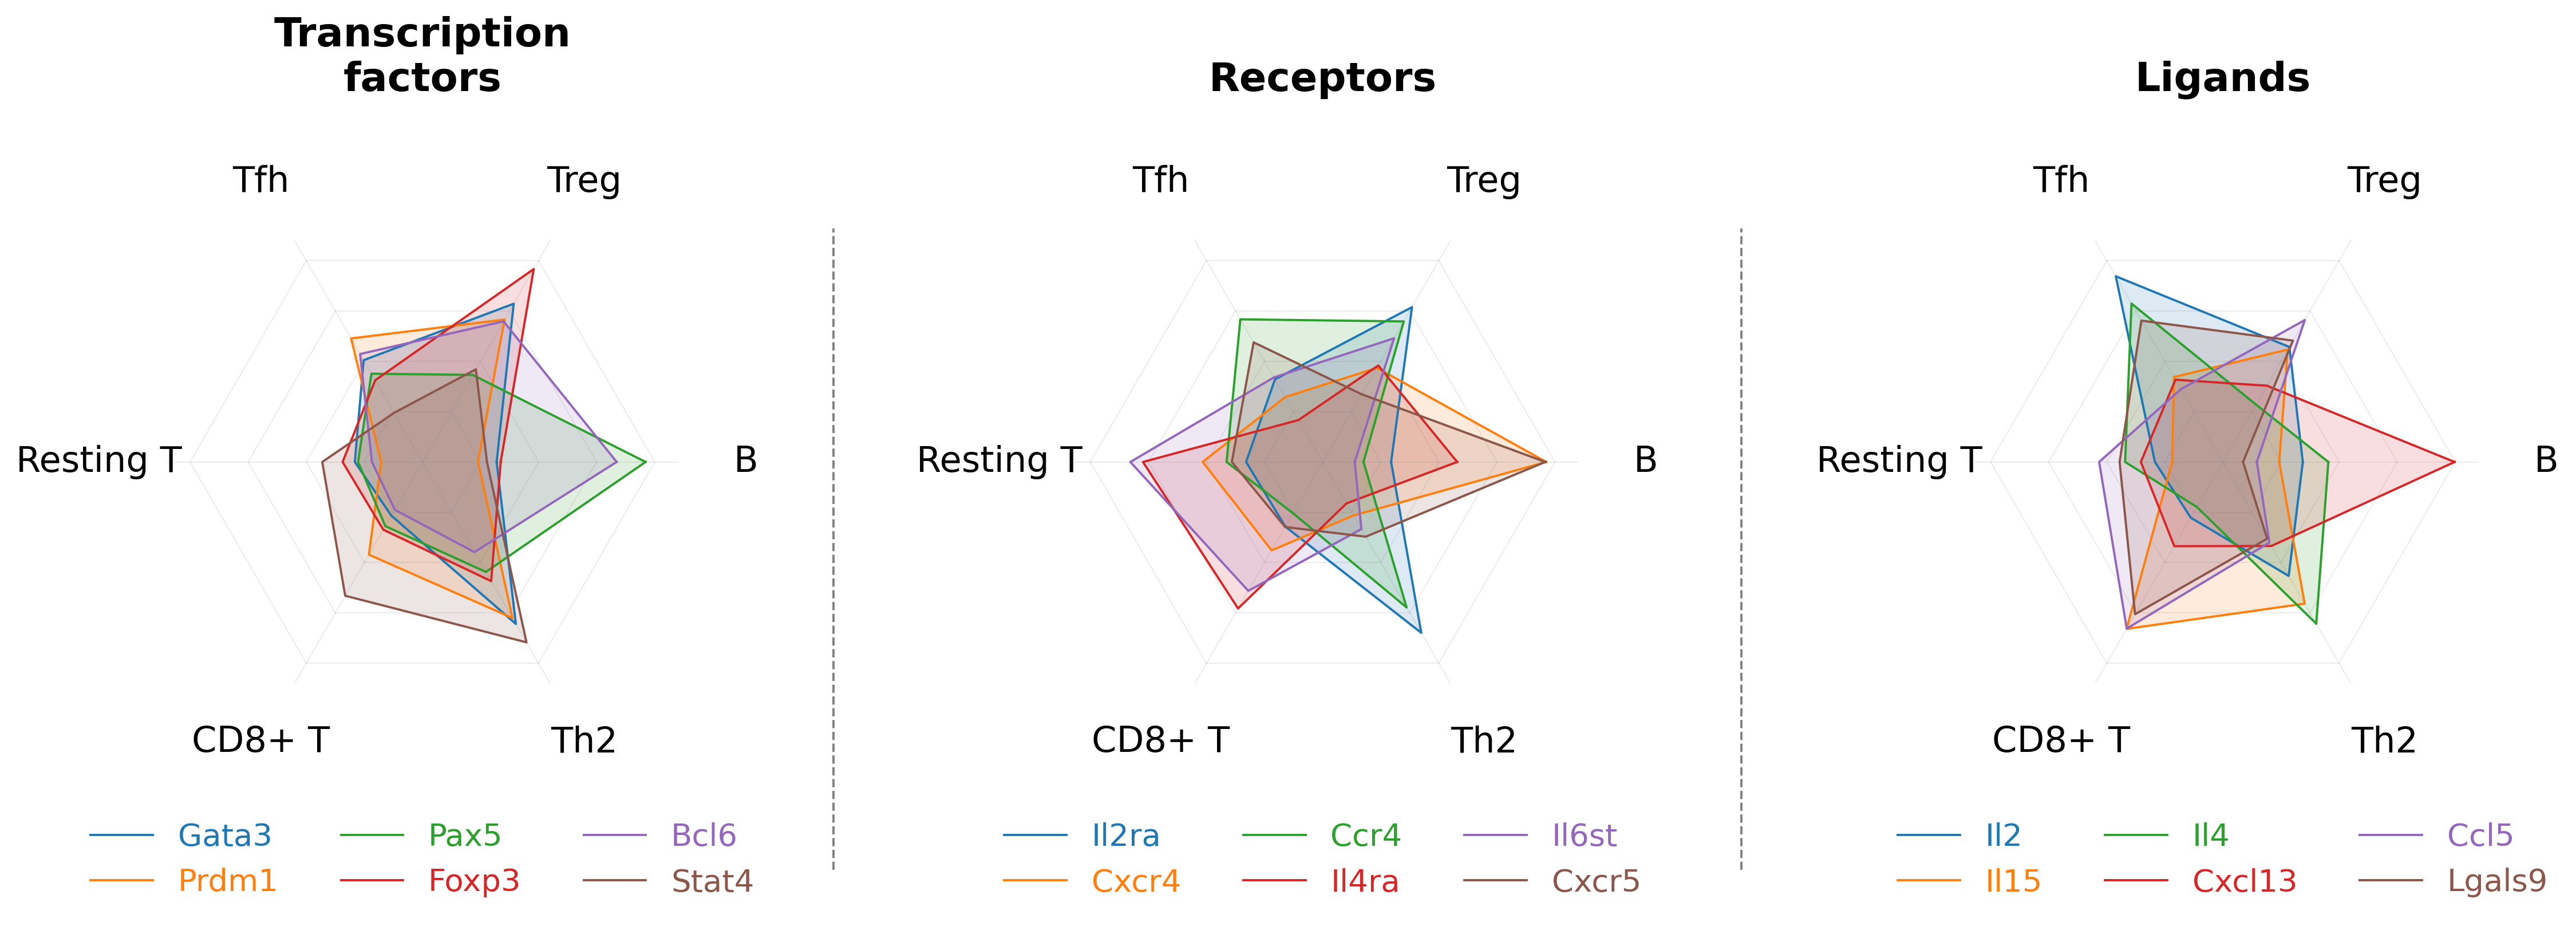

In [42]:
f, axs = tonsil.plot_radar(genes=[tf, receptors, ligands], 
    impact_df=impact_df, 
    figsize=(17, 5),
    dpi=140,
    label_size=16,
    legend_size=14,
)
fontsize = 18
axs[0].set_title('Transcription\nfactors', fontsize=fontsize, fontweight='bold', y=1.2)
axs[1].set_title('Receptors', fontsize=fontsize, fontweight='bold', y=1.2)
axs[2].set_title('Ligands', fontsize=fontsize, fontweight='bold', y=1.2)
plt.savefig(
    './figures/radar_plots.svg',
    **figure_params
)
plt.show()

In [9]:
# from spaceoracle.beta import Betabase

# bdb = Betabase(
#     adata, 
#     '/ix/djishnu/shared/djishnu_kor11/lasso_runs/human_tonsil',
#     # tonsil.adata, 
#     # tonsil.betadatas_path, 
#     subsample=None, 
#     float16=True, 
#     obs_names=adata.obs_names,
#     auto_load=False
# )

In [7]:
import os 

target_genes = ["Gata3", "Il2ra", "Stat6", "Il4", "Pdcd1", "Cxcr5", "Bcl6", "Stat3"]
betadir = '/ix/djishnu/shared/djishnu_kor11/lasso_runs/slideseq_mouse_lymphnode/'

data = {
    gene : pd.read_parquet(betadir + gene + '_betadata.parquet') for gene in target_genes if os.path.exists(betadir + gene + '_betadata.parquet')
}
len(data.keys())

6

In [8]:
interactions = {
    'Th2': {
        gene: data[gene].loc[adata[adata.obs['cell_type'] == 'Th2'].obs.index]
        for gene in data.keys()
    },
    'Tfh': {
        gene: data[gene].loc[adata[adata.obs['cell_type'] == 'Tfh'].obs.index]
        for gene in data.keys()
    }
}

In [9]:
dfr = pd.concat([interactions['Th2'][gene] for gene in ["Gata3", "Il2ra", "Il4"]], axis=0)
dfr = dfr.sum(axis=0)
dfr.sort_values(ascending=False)
dfr = dfr.loc[[('$' in x) for x in dfr.index]]
dfr.index = dfr.index.str.replace('beta_', '').str.replace('$', '-')
dfr.sort_values(ascending=False, inplace=True)

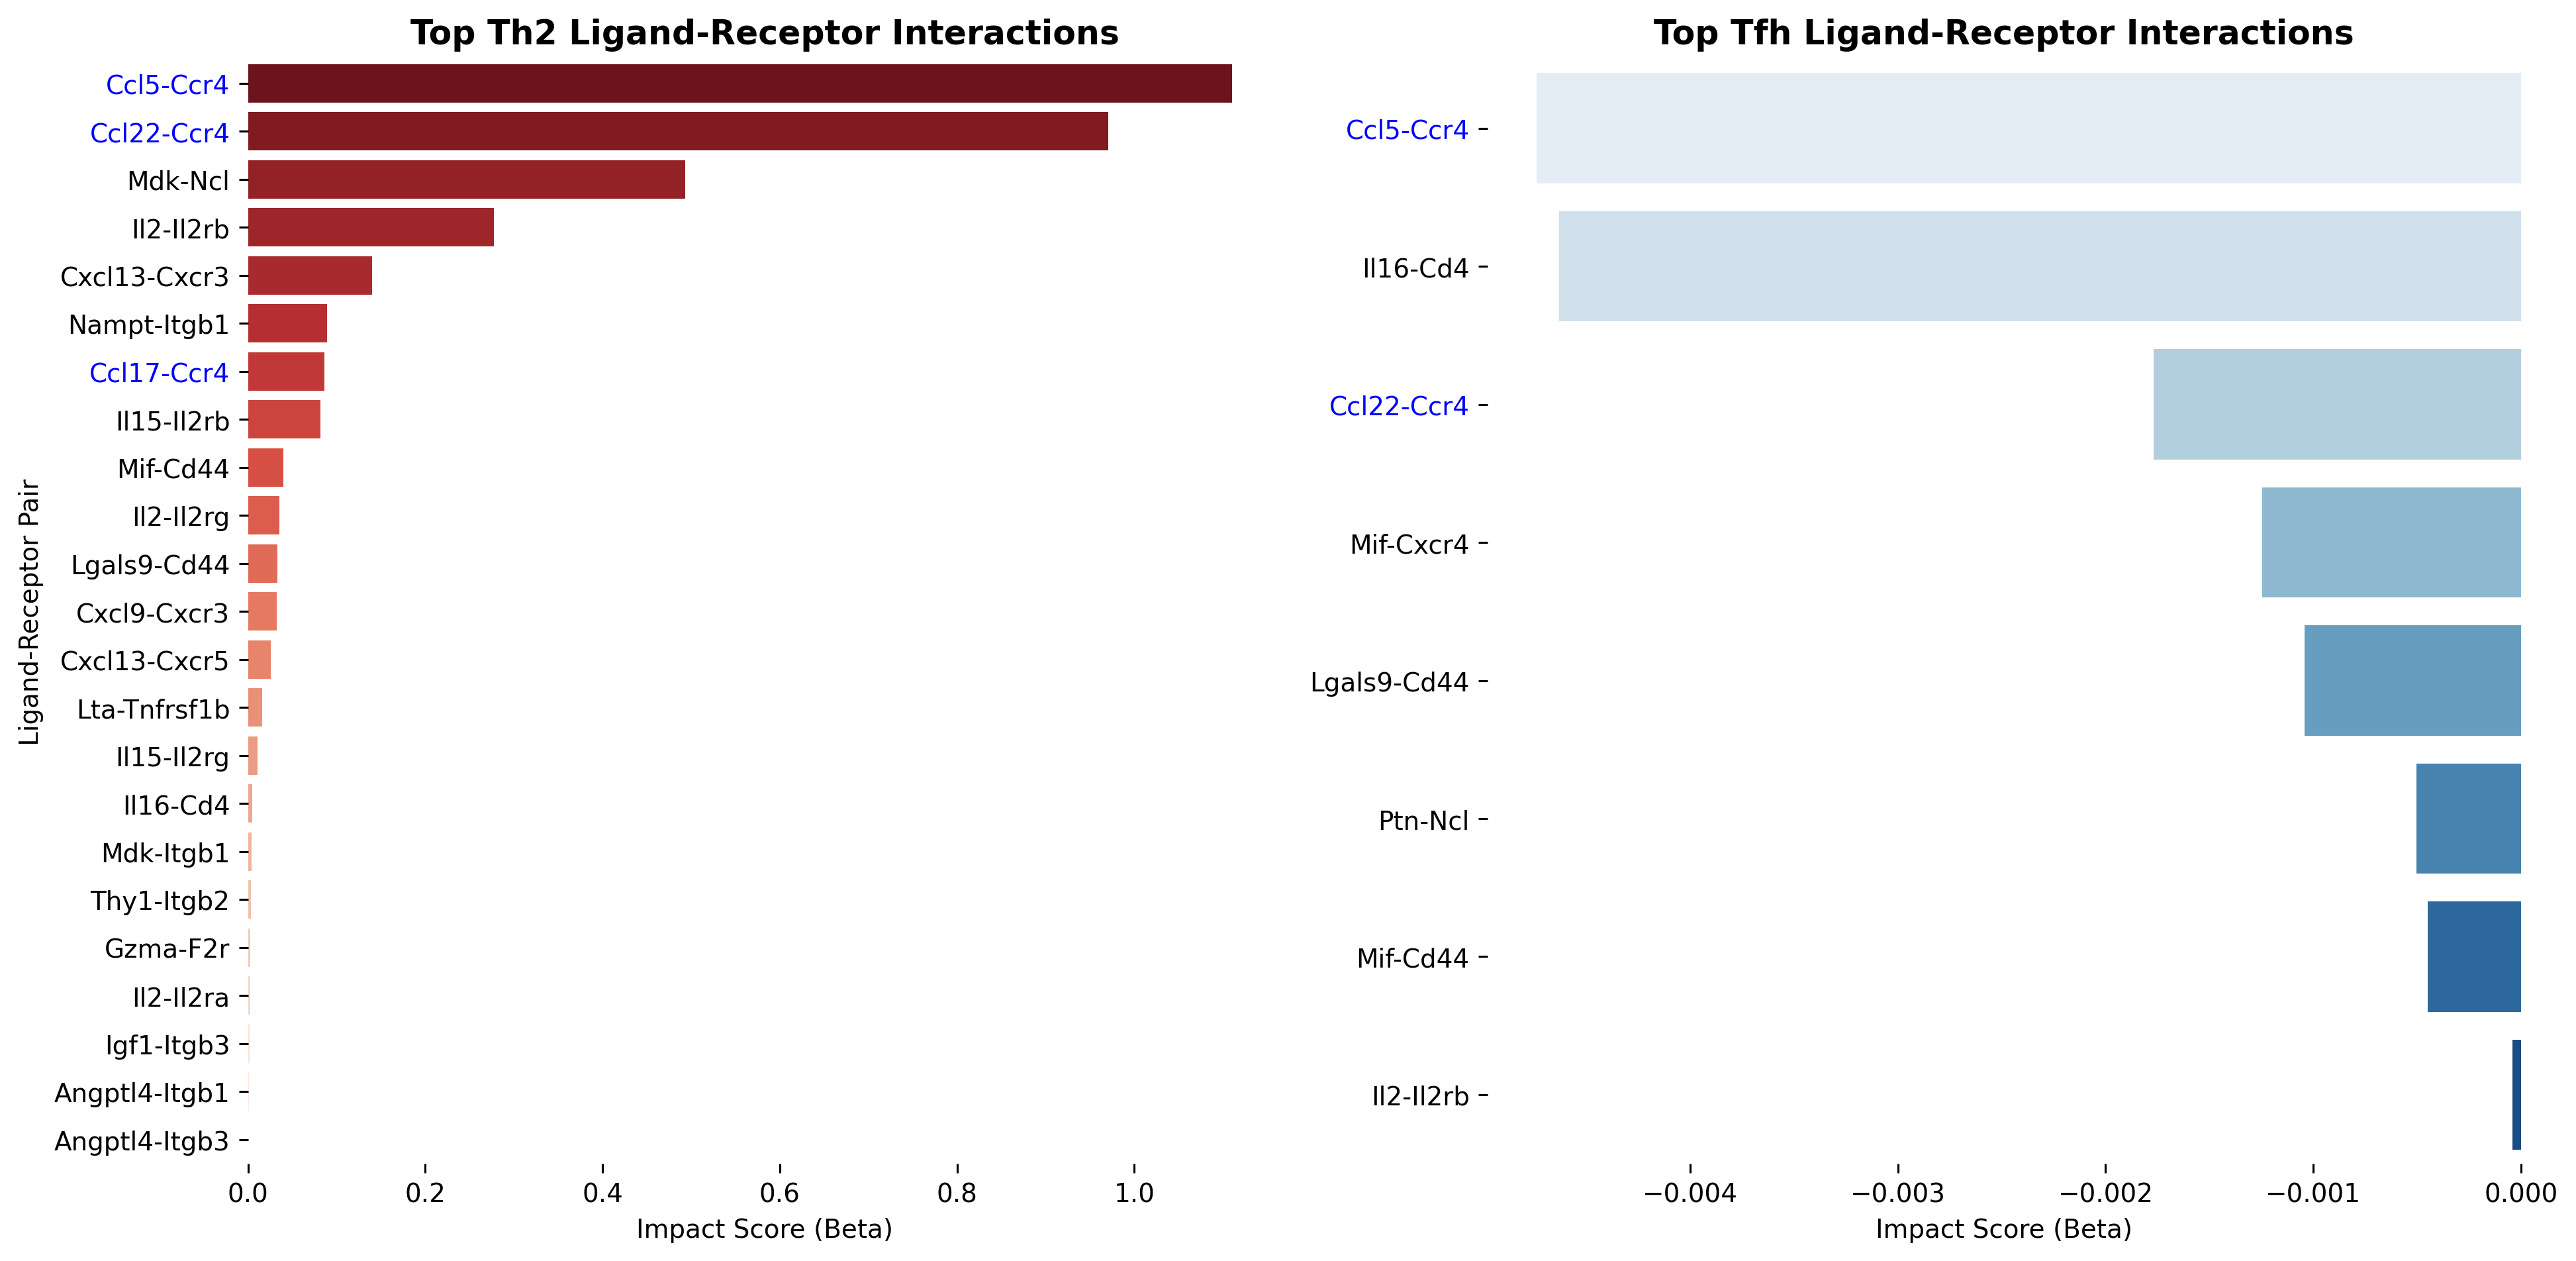

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Th2 data
dfr_th2 = pd.concat([interactions['Th2'][gene] for gene in ["Gata3", "Il2ra", "Il4"]], axis=0)
dfr_th2 = dfr_th2.sum(axis=0)
dfr_th2 = dfr_th2.loc[[('$' in x) for x in dfr_th2.index]]
dfr_th2.index = dfr_th2.index.str.replace('beta_', '').str.replace('$', '-')
dfr_th2 = dfr_th2[dfr_th2 > 0].sort_values(ascending=False).head(25)

# Tfh data
dfr_tfh = pd.concat([interactions['Tfh'][gene] for gene in ["Pdcd1", "Cxcr5", "Bcl6"]], axis=0)
dfr_tfh = dfr_tfh.sum(axis=0)
dfr_tfh = dfr_tfh.loc[[('$' in x) for x in dfr_tfh.index]]
dfr_tfh.index = dfr_tfh.index.str.replace('beta_', '').str.replace('$', '-')
dfr_tfh = dfr_tfh[dfr_tfh < 0].sort_values(ascending=True).head(25)

# drop C3 interactions due to overall C3 abundance in tissue
dfr_tfh = dfr_tfh[~dfr_tfh.index.str.contains('C3')]
dfr_th2 = dfr_th2[~dfr_th2.index.str.contains('C3')]

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, max(6, 0.3 * max(len(dfr_th2), len(dfr_tfh)))), dpi=140)

# Barplot for Th2
sns.barplot(
    x=dfr_th2.values, 
    y=dfr_th2.index, 
    ax=axes[0], 
    palette="Reds_r"
)
axes[0].set_title("Top Th2 Ligand-Receptor Interactions", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Impact Score (Beta)")
axes[0].set_ylabel("Ligand-Receptor Pair")

# Barplot for Tfh
sns.barplot(
    x=dfr_tfh.values, 
    y=dfr_tfh.index, 
    ax=axes[1], 
    palette="Blues"
)
axes[1].set_title("Top Tfh Ligand-Receptor Interactions", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Impact Score (Beta)")
axes[1].set_ylabel("")

for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Highlight Ccr4 if present
for ax in axes:
    for i, label in enumerate(ax.get_yticklabels()):
        if 'Ccr4' in label.get_text():
            label.set_color('blue')

plt.tight_layout()
plt.savefig('figures/mouse_lymph_slideseq_LR_interactions.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()


In [11]:
adata_1der = sc.read_h5ad('/ix/djishnu/Yijia/project_asthma_lung/1_slide_tcr_seq/data/slideTCR_asthma_lymphnode_tangramAnno_wTCR_wRegion_w1DERCT_sample1_test.h5ad')
transferred = adata_1der[adata_1der.obs['1DER'] == True].obs_names

adata.obs['1DER'] = adata.obs_names.isin(transferred)

transferred = adata.obs_names[adata.obs['1DER']].tolist() # some cells were filtered out

adata.obs['1DER_cell_type'] = adata.obs['cell_type'].copy().astype(str)
adata.obs.loc[transferred, '1DER_cell_type'] = adata_1der.obs.loc[transferred, '1DER_cell_type'].astype(str)
adata.obs['1DER'].value_counts()


1DER
False    21385
True       620
Name: count, dtype: int64

In [12]:
banksy_df = pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_slideseq/banksy_cluster.csv', index_col=0)
adata.obs = pd.concat([adata.obs, banksy_df['banksy_cluster'].reindex(adata.obs.index, axis=0).fillna('other')], axis=1)

In [14]:
simulated_gex = pd.read_parquet('/ix/djishnu/shared/djishnu_kor11/genome_screens/slideseq_mouse_lymphnode/Ccr4_4n_0x_1der.parquet')
adata.layers['simulated_count'] = simulated_gex.loc[adata.obs_names, adata.var.index].values

simulated_gex.loc[adata.obs.index[adata.obs['1DER'] == True], 'Ccr4'].sum()

0.0

In [97]:
for i in adata.obs['banksy_cluster'].unique():
    if i not in color_dict:
        color_dict[i] = 'gray'

for i in adata.obs['1DER_cell_type'].unique():
    if i not in color_dict:
        color_dict[i] = 'gray'

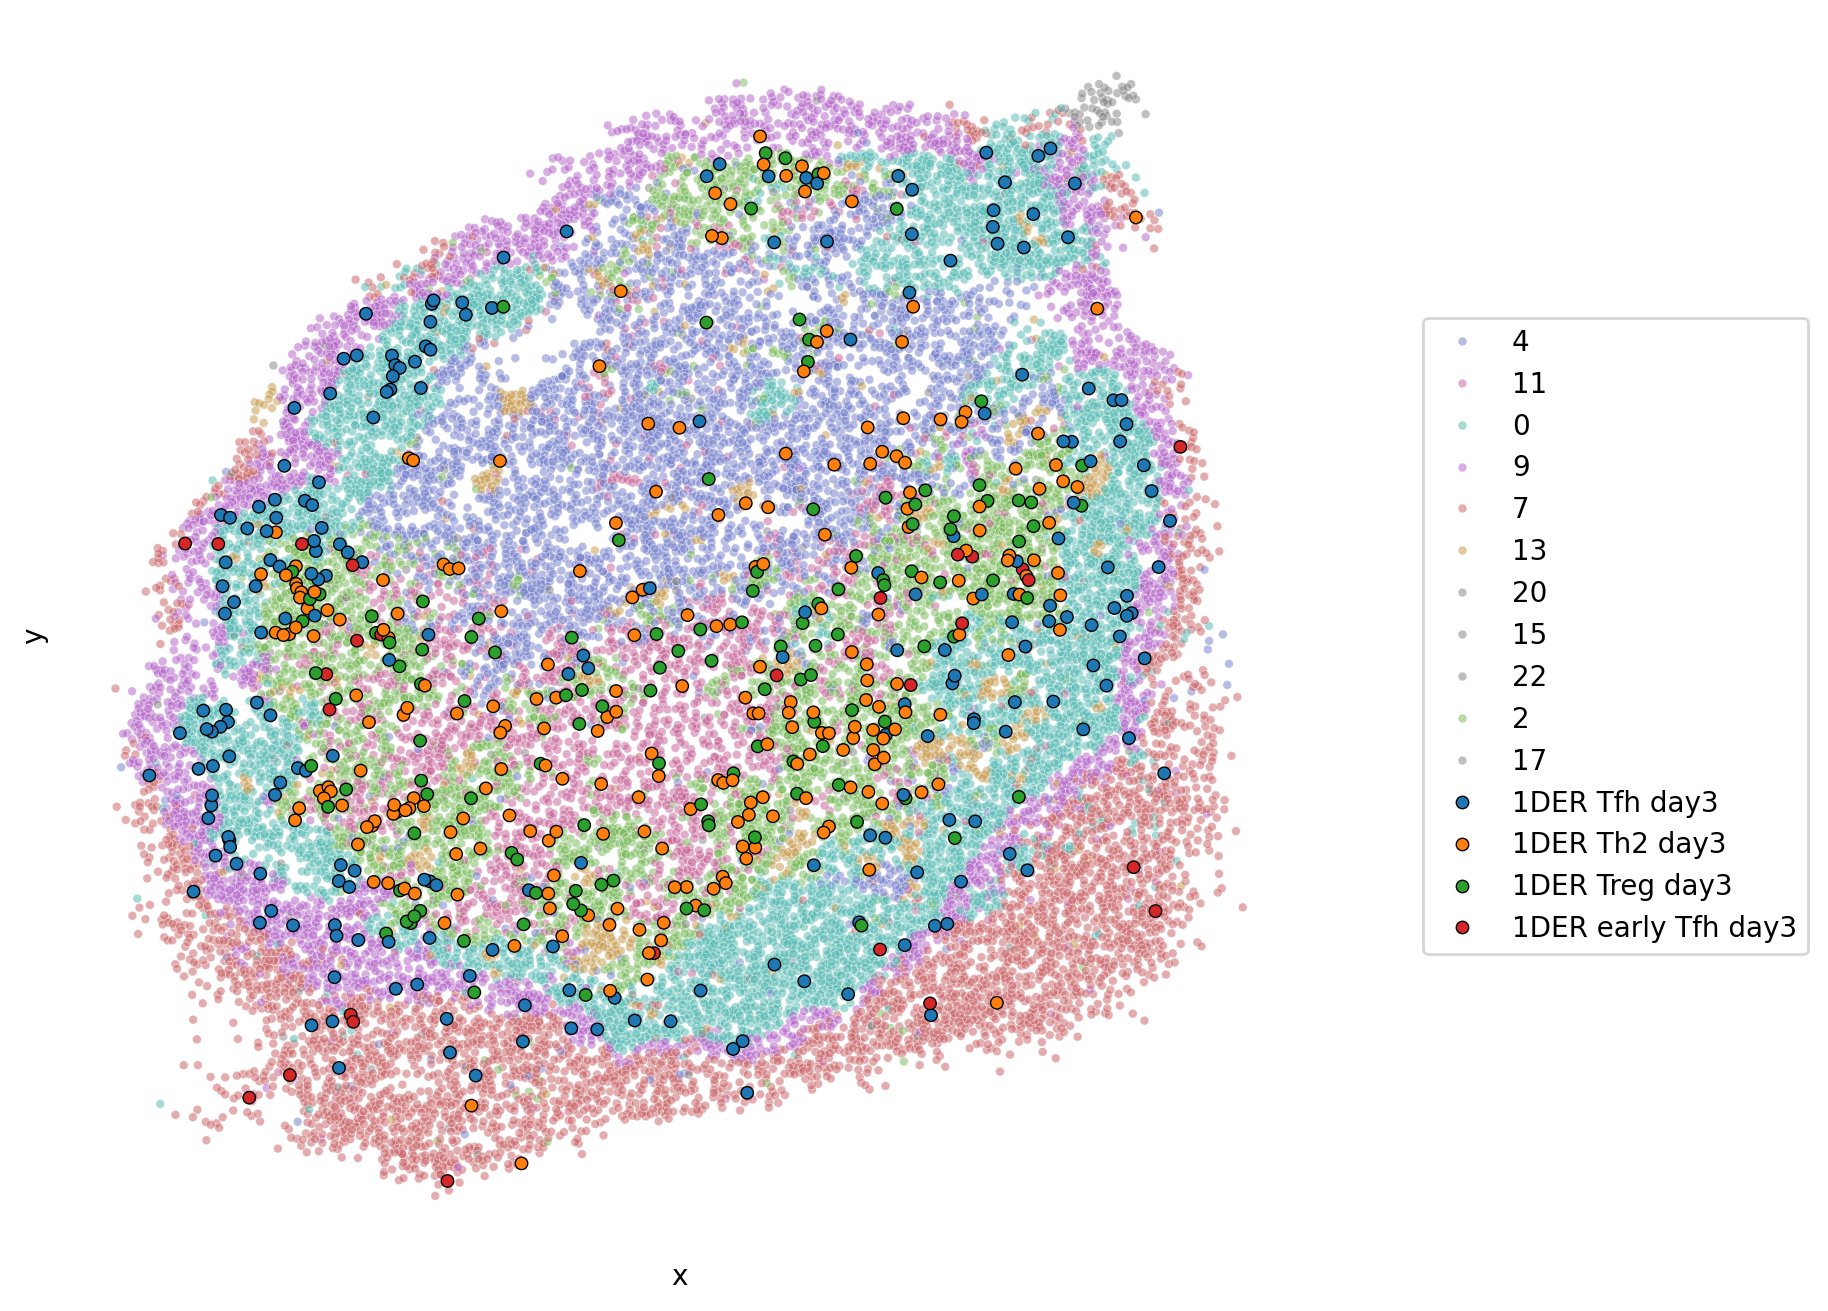

In [99]:
data = pd.concat(
        [pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names, columns=['x', 'y']), 
        adata.obs], 
    axis=1)

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=data,
    x='x', y='y',
    hue='banksy_cluster',
    palette=color_dict,
    alpha=0.5,
    s=10,
    ax=ax,
)

sns.scatterplot(
    data=data.loc[transferred],
    x='x', y='y',
    hue='1DER_cell_type',
    alpha=1, edgecolor='black',
    linewidth=0.5,
    s=20,
    ax=ax,
)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove unused categories from legend
handles, labels = ax.get_legend_handles_labels()
# Get unique categories that are actually present in the data
unique_banksy = data['banksy_cluster'].unique()
unique_1der = data.loc[transferred, '1DER_cell_type'].unique()

# Filter legend handles and labels to only include categories present in the data
filtered_handles = []
filtered_labels = []
for handle, label in zip(handles, labels):
    if label in unique_banksy or label in unique_1der:
        filtered_handles.append(handle)
        filtered_labels.append(label)

ax.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1.1, 0.5), borderaxespad=0)
plt.savefig('figures/mouse_lymph_slideseq_1DER_locations.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

In [161]:
from spaceoracle.plotting.cartography import Cartography

chart = Cartography(
    adata[transferred], 
    color_dict=color_dict)

gene_mtx = adata.to_df(layer='imputed_count')
delta_X = simulated_gex - gene_mtx
delta_X = delta_X.loc[transferred]

In [147]:
sc.pp.pca(chart.adata)
sc.pp.neighbors(chart.adata, use_rep='X_pca', n_neighbors=10)
sc.tl.umap(chart.adata)

In [148]:
import gc
gc.collect()

32484

In [155]:
chart.adata.obs['1DER_cell_type'].value_counts()

1DER_cell_type
1DER Th2 day3          241
1DER Tfh day3          226
1DER Treg day3         126
1DER early Tfh day3     27
Name: count, dtype: int64

In [162]:
chart.adata.n_obs * 0.2

124.0

In [163]:
P = chart.compute_transition_probabilities(
    delta_X.values, 
    embedding=chart.adata.obsm['X_umap'],
    n_neighbors=120
)

In [164]:
# can't start vars with numbers bc something inside chart is probably using .query
chart.adata.obs['oneDER_cell_type'] = chart.adata.obs['1DER_cell_type'].copy()

if 'transition' in chart.adata.obs.columns:
    chart.adata.obs.drop(columns=['transition'], inplace=True)

chart.get_transition_annot(
    P,
    allowed_fates=chart.adata.obs['oneDER_cell_type'].unique(), 
    thresh=0, 
    annot="oneDER_cell_type"
)

source ct 1DER Th2 day3 Counter({'1DER Th2 day3': 158, '1DER early Tfh day3': 41, '1DER Treg day3': 38, '1DER Tfh day3': 4}) 0.0002308260635379528 0.0
source ct 1DER Tfh day3 Counter({'1DER Tfh day3': 173, '1DER early Tfh day3': 37, '1DER Th2 day3': 8, '1DER Treg day3': 8}) 0.00045953888119021347 7.205586840668234e-06
source ct 1DER Treg day3 Counter({'1DER early Tfh day3': 48, '1DER Treg day3': 43, '1DER Th2 day3': 26, '1DER Tfh day3': 9}) 0.0003618322607050533 3.856174127795391e-05
source ct 1DER early Tfh day3 Counter({'1DER early Tfh day3': 21, '1DER Tfh day3': 5, '1DER Th2 day3': 1}) 0.0007868917385388475 0.0


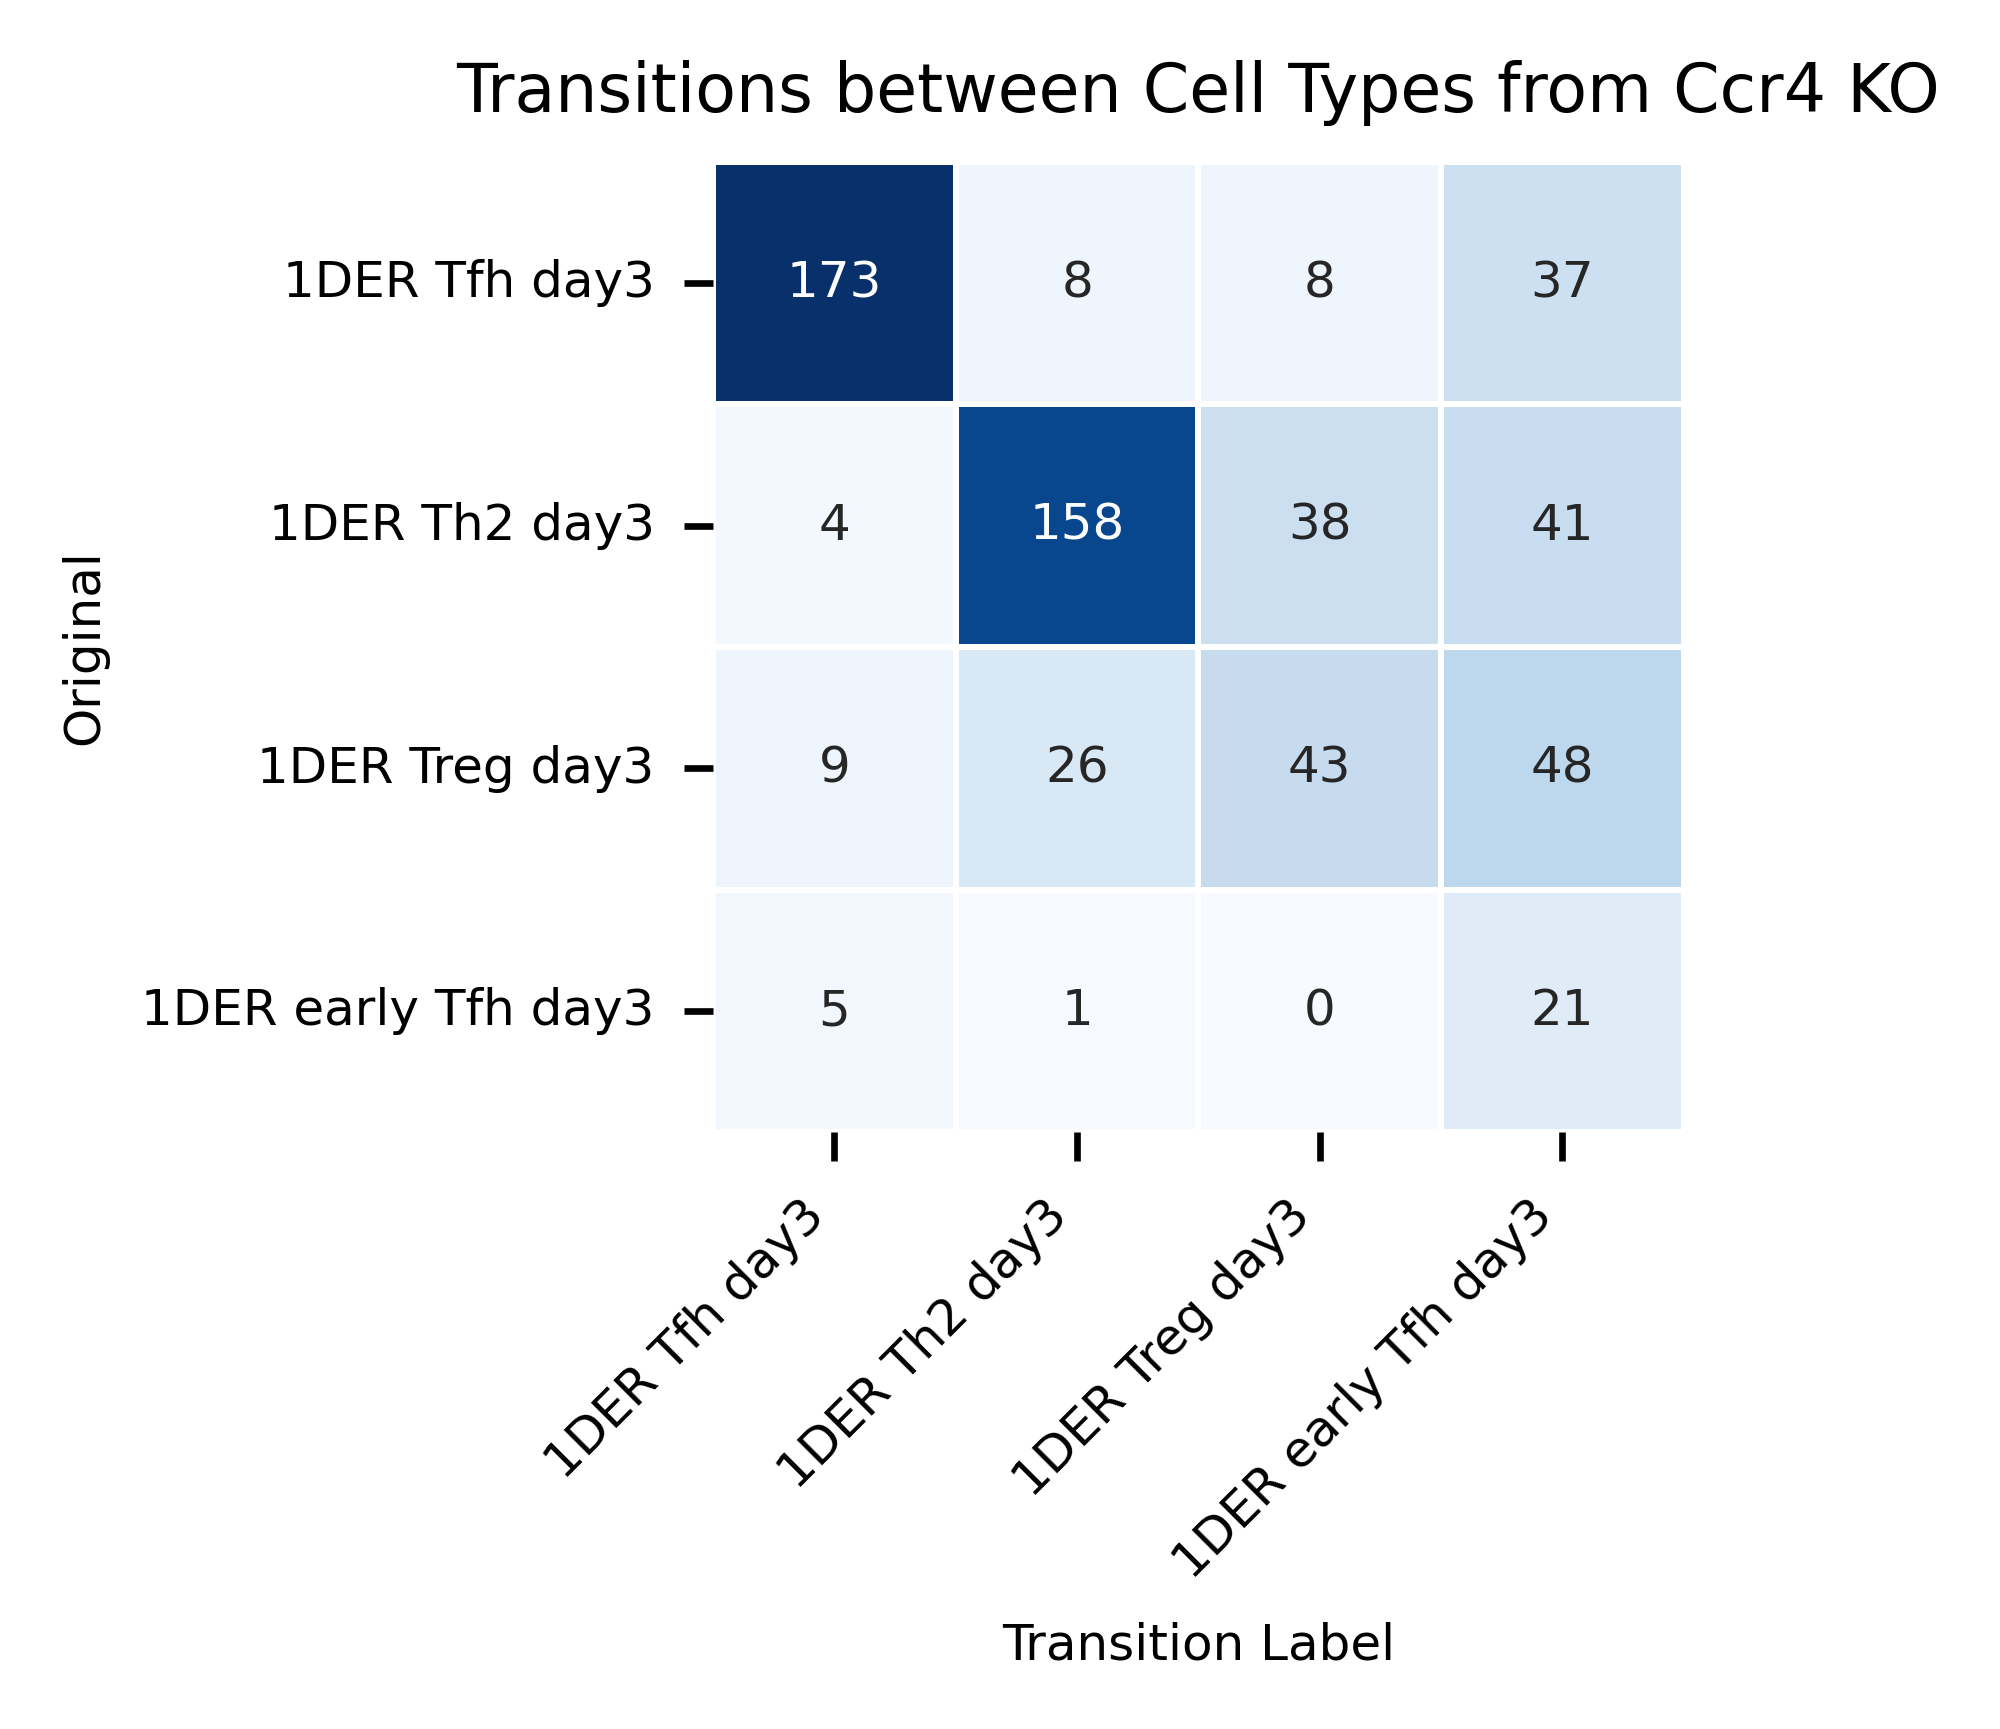

In [165]:
df = chart.adata.obs[['1DER_cell_type', 'transition']].copy()
counts = df.groupby(['1DER_cell_type', 'transition']).size().unstack(fill_value=0)

plt.figure(figsize=(3,3), dpi=300)

if counts.empty:
    counts = pd.DataFrame(0, index=counts.index, columns=counts.columns)
elif len(counts.index) != len(counts.columns):
    # Add missing rows/columns with zeros
    all_labels = sorted(set(counts.index) | set(counts.columns))
    counts = counts.reindex(index=all_labels, columns=all_labels, fill_value=0)

counts = counts.loc[np.unique([x for x in counts.index]).astype(str)] 

sns.heatmap(
    counts,
    annot=True,
    fmt='d',  
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title(f"Transitions between Cell Types from Ccr4 KO", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.tight_layout()
plt.savefig(f'figures/mouse_lymph_slideseq_Ccr4KO_celltype_transitions_1DER.svg', format='svg', bbox_inches='tight', transparent=True)
plt.show()

In [158]:
chart = Cartography(adata[adata.obs['1DER_cell_type'] == '1DER Th2 day3'], color_dict=color_dict)

gene_mtx = adata.to_df(layer='imputed_count')
delta_X = simulated_gex - gene_mtx

gene_mtx = gene_mtx.loc[chart.adata.obs.index]
delta_X = delta_X.loc[chart.adata.obs.index]

P = chart.compute_transition_probabilities(
    delta_X, 
    embedding=chart.adata.obsm['X_umap'],
    n_neighbors=800
)

chart.get_transition_annot(
    P,
    allowed_fates=chart.adata.obs['banksy_cluster'].unique(), 
    thresh=0, 
    annot='banksy_cluster'
)

source ct 7 Counter({'0': 4}) 0.0033579342021923123 0.0031409959911463136
source ct 9 Counter({'7': 3}) 0.004197909996847991 0.0013943231973376476
source ct 4 Counter({'7': 30, '0': 5, '9': 2}) 0.004225943093436141 0.0016990329690734726
source ct 2 Counter({'7': 105, '0': 25, '9': 14, '11': 7}) 0.00420916074694942 0.0015028865332015165
source ct 13 Counter({'7': 10, '0': 2}) 0.004199622460263132 0.0013953868491231012
source ct 11 Counter({'7': 23, '0': 3, '11': 1}) 0.003345212603135905 0.002176240959488963
source ct 0 Counter({'7': 5}) 0.004216862603982946 0.0025144811590342786
source ct 17 Counter({'7': 1, '0': 1}) 0.0033412600944389636 0.0


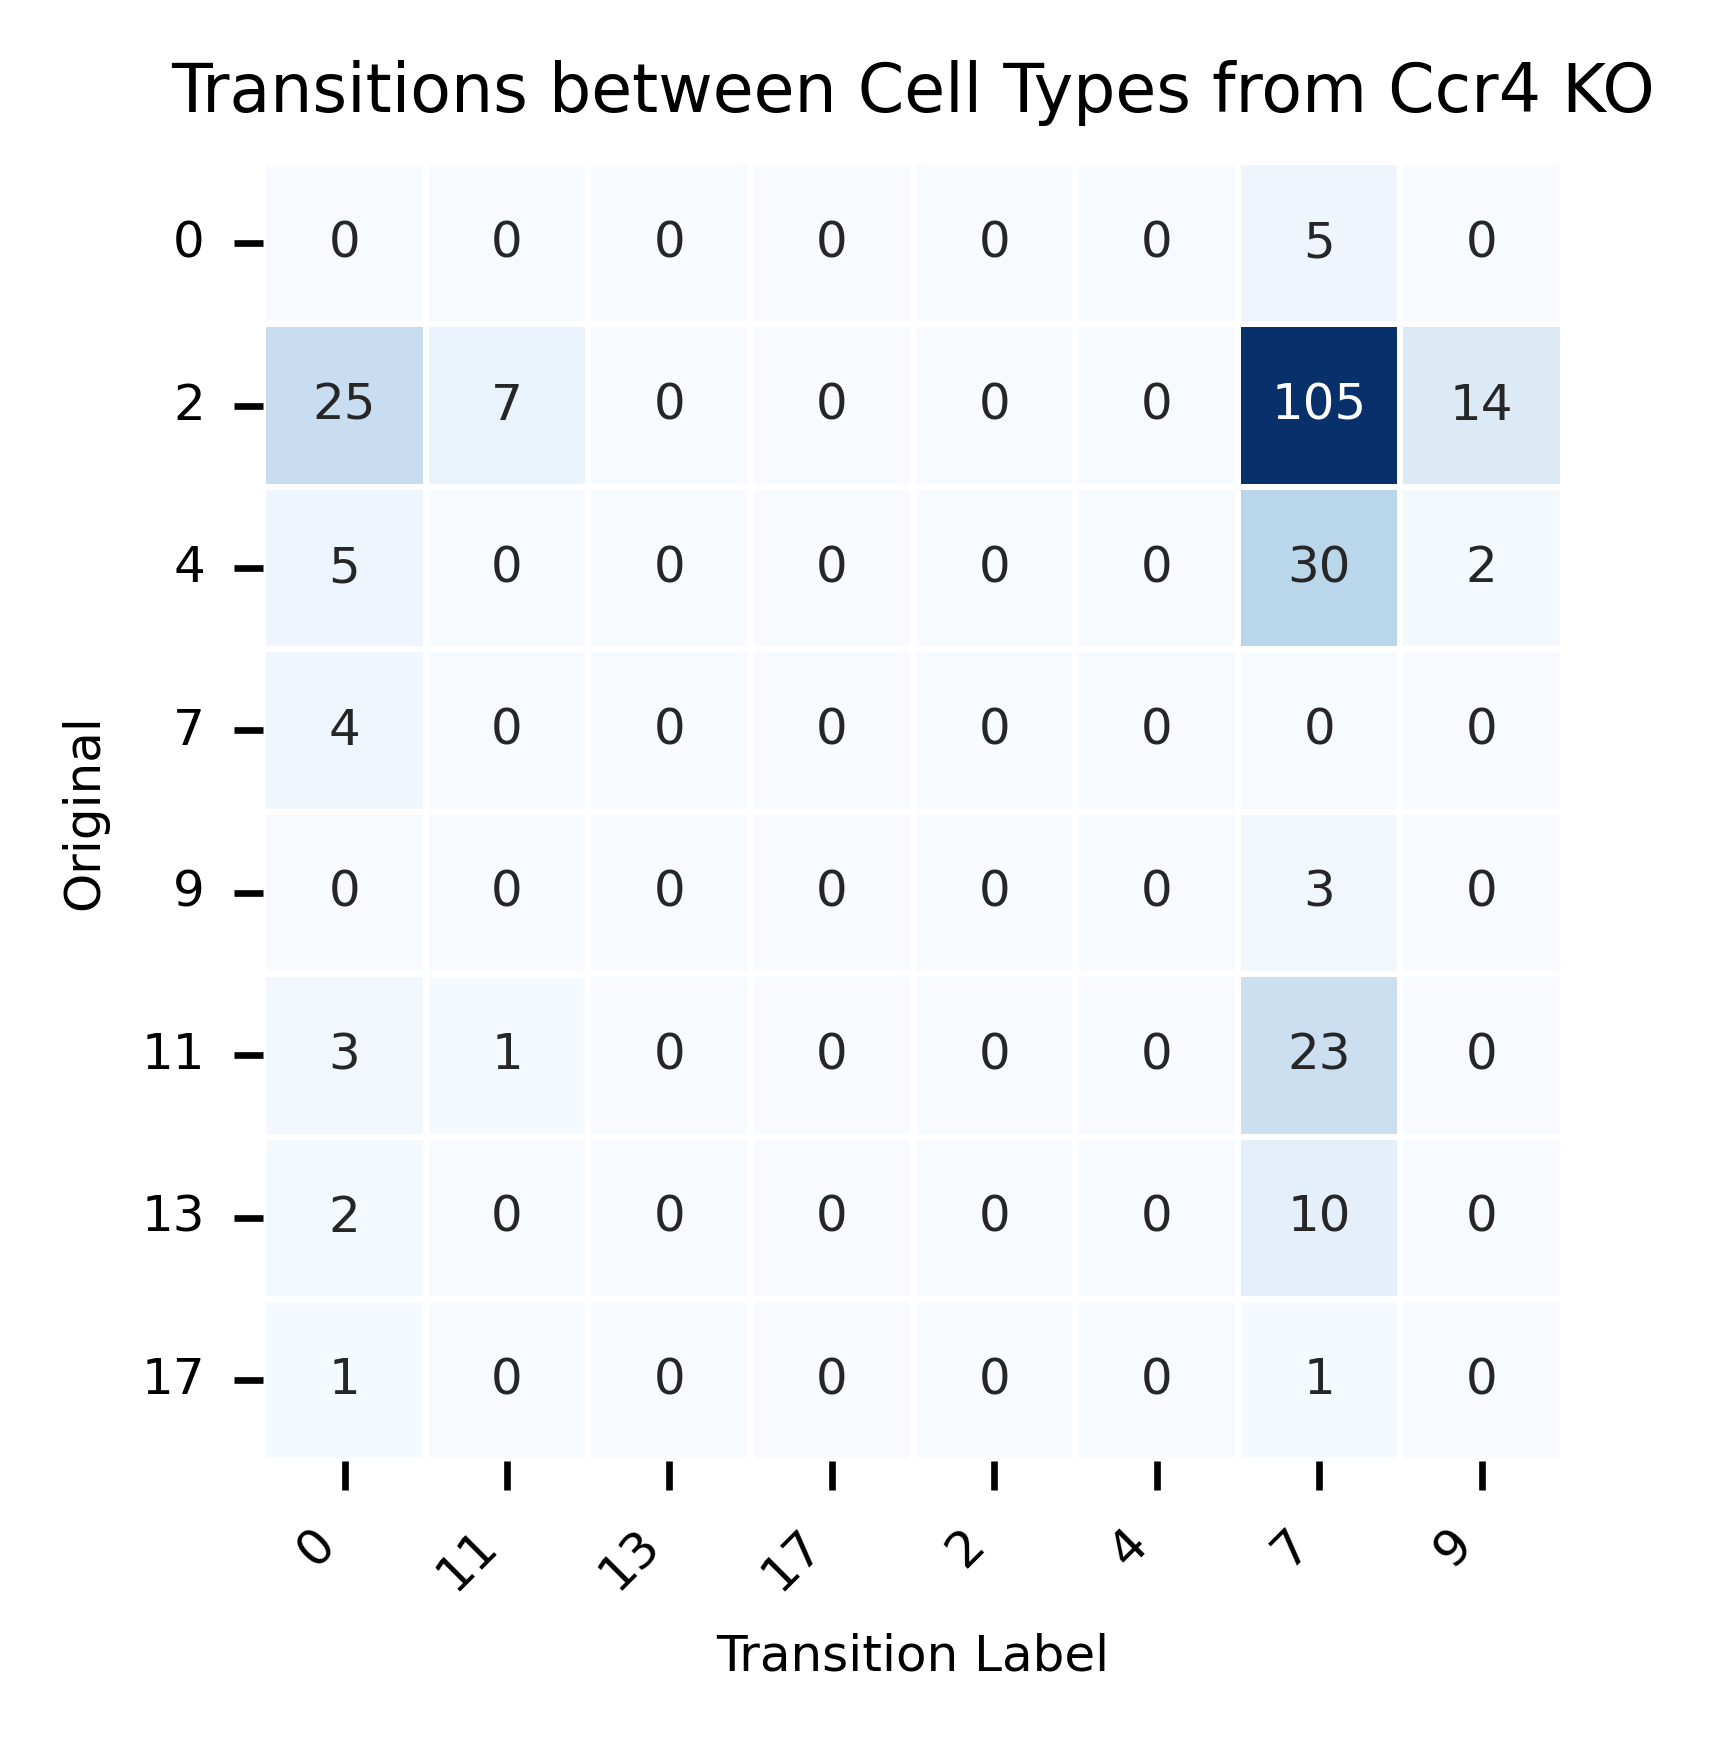

In [159]:
df = chart.adata.obs[['banksy_cluster', 'transition']].copy()
counts = df.groupby(['banksy_cluster', 'transition']).size().unstack(fill_value=0)

plt.figure(figsize=(3,3), dpi=300)

if counts.empty:
    counts = pd.DataFrame(0, index=counts.index, columns=counts.columns)
elif len(counts.index) != len(counts.columns):
    # Add missing rows/columns with zeros
    all_labels = sorted(set(counts.index) | set(counts.columns))
    counts = counts.reindex(index=all_labels, columns=all_labels, fill_value=0)

counts = counts.loc[np.unique([int(x) for x in counts.index]).astype(str)] 

sns.heatmap(
    counts,
    annot=True,
    fmt='d',  
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title(f"Transitions between Cell Types from Ccr4 KO", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.tight_layout()
plt.savefig(f'figures/mouse_lymph_slideseq_Ccr4KO_banksy_transitions_1DER.svg', format='svg', bbox_inches='tight', transparent=True)
plt.show()